# 데이터전처리(~2022)

In [1]:
import pandas as pd

# # date Feature를 '월'로 변경(1월 ~ 12월)하는 함수
def date_to_month(df):
    df['month'] = df.index.str.slice(5, 7).astype(int)
    return df.drop(['date'], axis=1)

# Month Feature를 추가하고 데이터를 섞어서 전처리하는 함수
def df_preprocessing(X, y):
    df_data = X
    df_label = y
    # date Feature를 '월'로 변경(1월 ~ 12월)
    df_data['month'] = df_data.index.str.slice(5, 7).astype(int)
    df_data = df_data.drop(['date'], axis=1)
    # 인덱스 제거(label과 합치기 위해)
    df_data.reset_index(drop=True, inplace=True)
    # 인덱스 제거(data와 합치기 위해)
    df_label.reset_index(drop=True, inplace=True)
    # data와 label을 합침
    df = pd.concat([df_data, df_label], axis=1)
    # 데이터프레임 행 셔플
    df = df.sample(frac=1).reset_index(drop=True)
    # 이상치로 예상되는 데이터 제거
    df = df[df['mode'] != 2]
    # 만약 라벨이 카테고리화되어 있으면(라벨의 컬럼명이 'top')
    try:
        # 다시 입력값(데이터)와 결과값(라벨)을 분리하여 리턴
        return df.drop(['top'], axis=1), df[['top']]
    # 만약 라벨이 카테고리화되어 있지 않으면(라벨의 컬럼명이 '0')
    except KeyError:
        # 다시 입력값(데이터)와 결과값(라벨)을 분리후 라벨을 카테고리화하여 리턴
        return df.drop(['0'], axis=1), ((df[['0']] - 1) // 10) * 10 + 10

In [2]:
import pandas as pd

# 데이터 받아오기
data = pd.read_csv('data/dataframes/dataframe_final.csv', index_col=0)
label = pd.read_csv('data/dataframes/label_categorized_final.csv', index_col=0)

In [3]:
# 데이터 전처리
X, y = df_preprocessing(data, label)

In [4]:
# 훈련 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 2023년 데이터 생성

In [5]:
# 2023년도 데이터 받아오기
data2023 = pd.read_csv('data/dataframes/dataframe_2023to2023.csv', index_col=0)
label2023 = pd.read_csv('data/dataframes/label_2023to2023.csv', index_col=0)

In [6]:
# 2023년도 데이터 전처리
X_2023, y_2023 = df_preprocessing(data2023, label2023)

# 의사결정트리

In [7]:
# 기본 의사결정트리 모델

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt.score(X_test, y_test)

0.3987604346876732

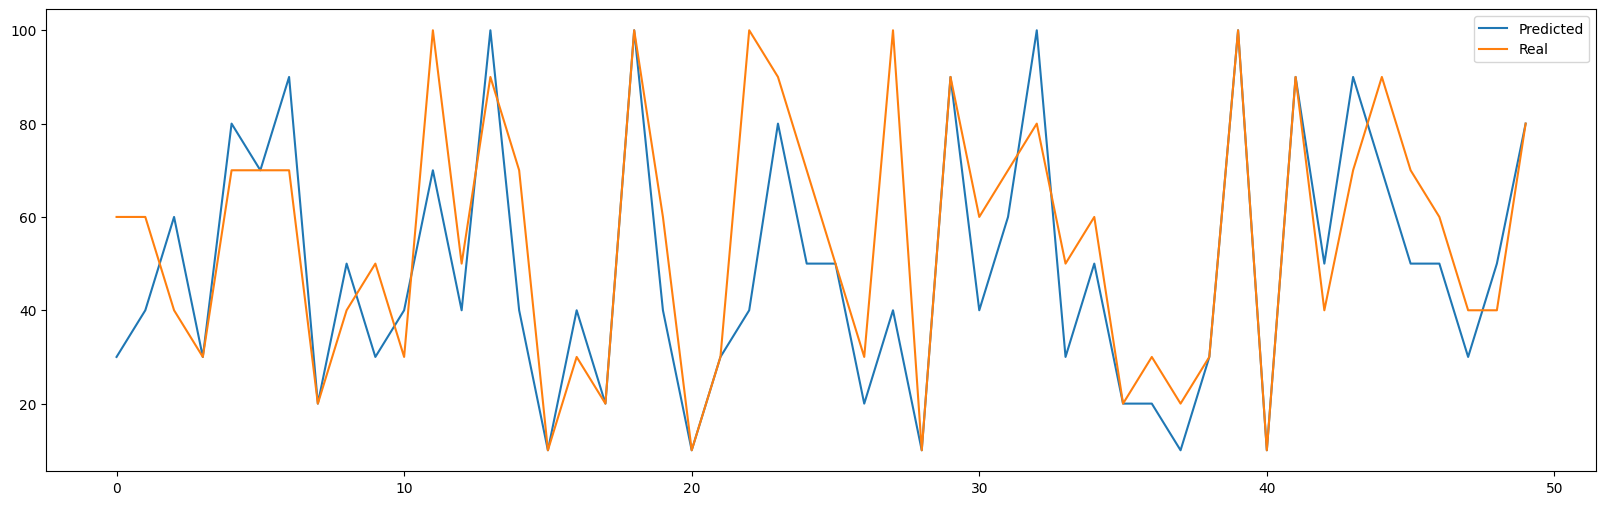

In [8]:
# 2022년도까지의 랜덤 테스트 값 예측 시각화

import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(dt_pred[:50], label="Predicted")
plt.plot(y_test[:50].values, label="Real")
plt.legend()
plt.show()

In [9]:
# 2023년도 분류 모델 성능
dt.score(X_2023, y_2023)

0.09719554360353438

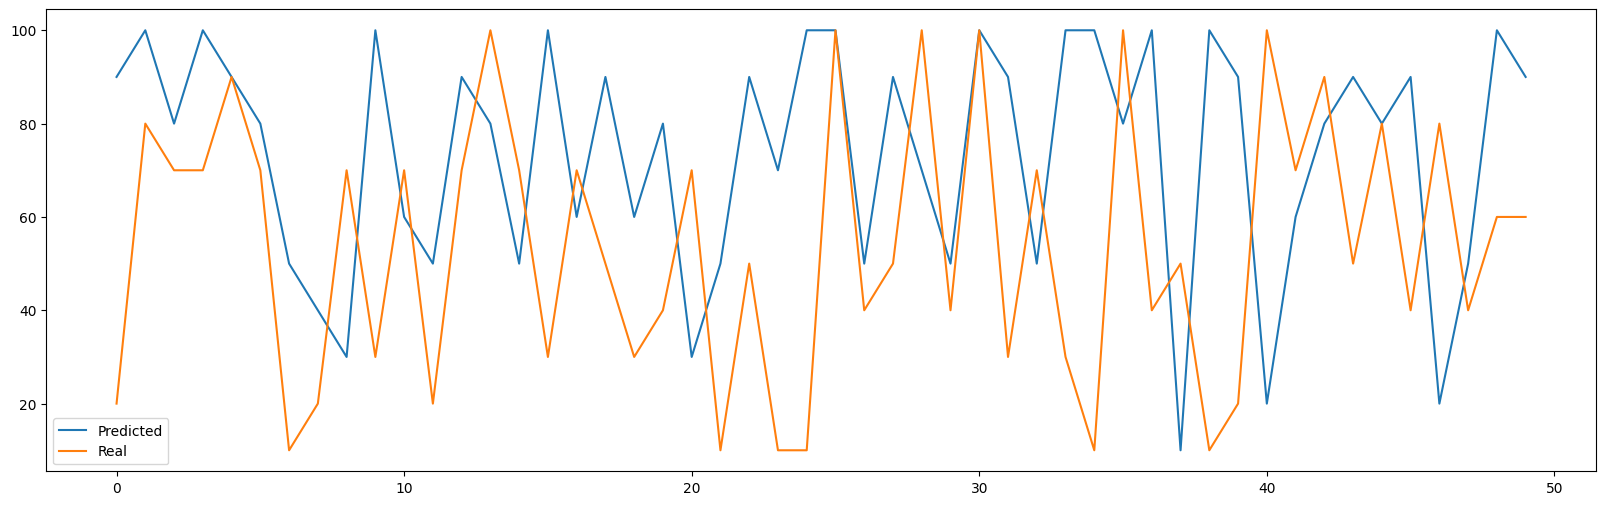

In [10]:
# 2023년도 랜덤 테스트 값 예측 시각화

import matplotlib.pyplot as plt

dt_pred_2023 = dt.predict(X_2023)

plt.figure(figsize=(20,6))
plt.plot(dt_pred_2023[:50], label="Predicted")
plt.plot(y_2023[:50].values, label="Real")
plt.legend()
plt.show()

# 일반화된 모델 학습 및 시각화 함수 구현

In [14]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# matplotlib 한글 패치
font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

# 예측값과 실제값을 시각화하는 함수
def pred_visualize(pred, real, title):
    plt.figure(figsize=(20, 6))
    plt.plot(pred, label="Predicted")
    plt.plot(real, label="Real")
    plt.legend()
    plt.show()

# 모델 정확도 및 시각화 함수
def model_fit_and_visualize(model, name = '모델'):
    print(name, '학습 중')
    # 라벨을 데이터프레임에서 1차원 배열로 재배열
    y_train_label = y_train.values.reshape(-1)
    y_test_label = y_test.values.reshape(-1)
    y_2023_label = y_2023.values.reshape(-1)
    # 모델 학습 (평생 걸림)
    model.fit(X_train, y_train_label)
    model_pred = model.predict(X_test)

    # ~2022년도 분류 모델 성능 출력
    print(name, '기존 데이터 정확도 :', model.score(X_test, y_test_label))

    # ~2022년도 데이터 예측값과 실제값 비교 시각화
    pred_visualize(model_pred[:50], y_test_label[:50], name + ' 기존 데이터 50개 샘플 예측 시각화')

    # 2023년도 분류 모델 성능 출력
    print(name, '2023년 데이터 정확도 :', model.score(X_2023, y_2023_label))

    # 2023년도 모델 예측값 생성
    model_pred_2023 = model.predict(X_2023)

    # ~2023년도 데이터 예측값과 실제값 비교 시각화
    pred_visualize(model_pred_2023[:50], y_2023[:50].values, name + '2023년 데이터 50개 샘플 예측 시각화')

# 의사 결정 나무

결정 트리 분류 모델 학습 중
결정 트리 분류 모델 기존 데이터 정확도 : 0.3946621428691402


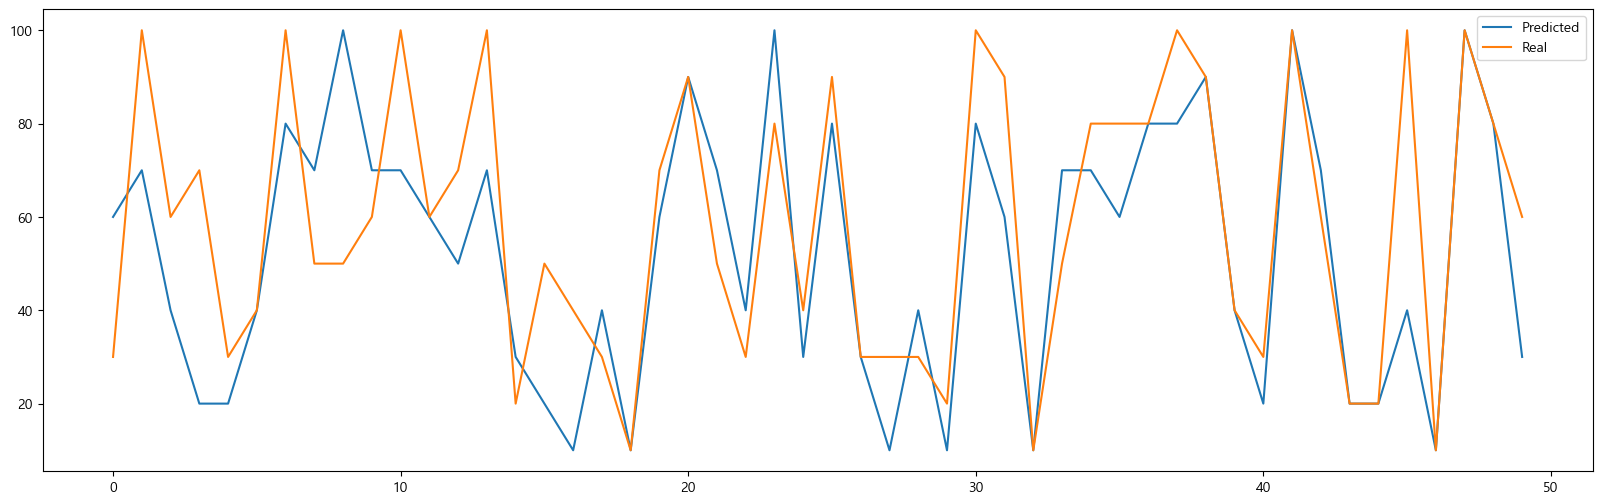

결정 트리 분류 모델 2023년 데이터 정확도 : 0.0958509412216673


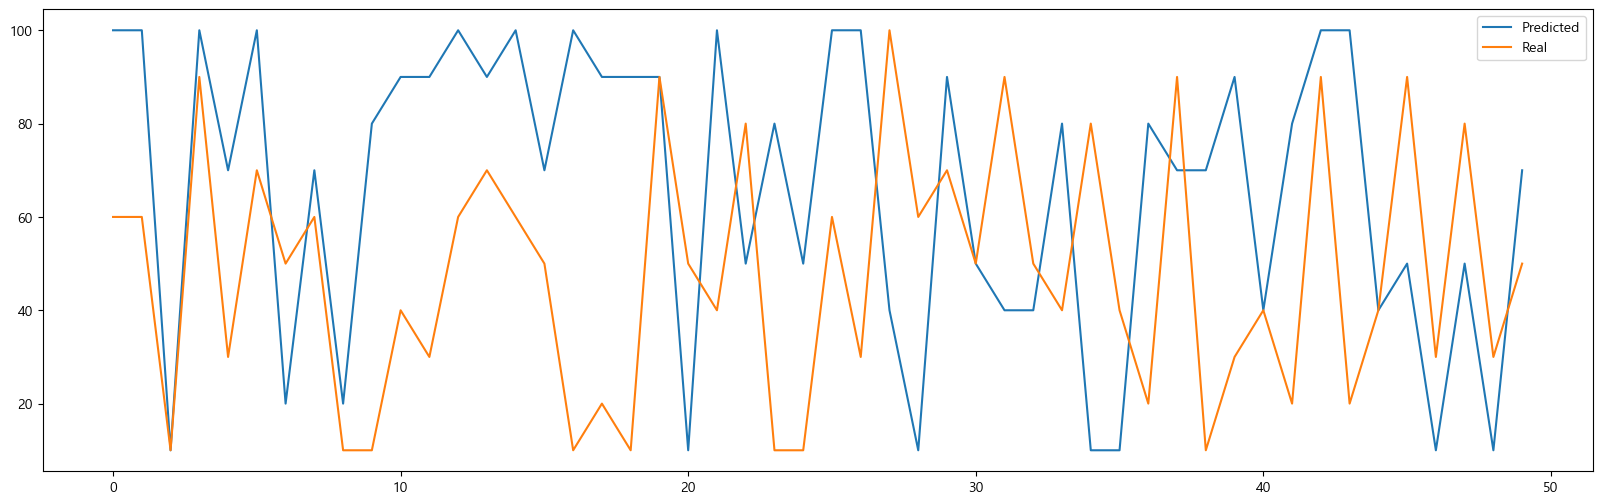

In [15]:
from sklearn.tree import DecisionTreeClassifier

model_fit_and_visualize(DecisionTreeClassifier(), '결정 트리 분류 모델')

# SVM(서포트 벡터 머신)

SVM 분류 모델 학습 중
SVM 분류 모델 기존 데이터 정확도 : 0.11871609251389892


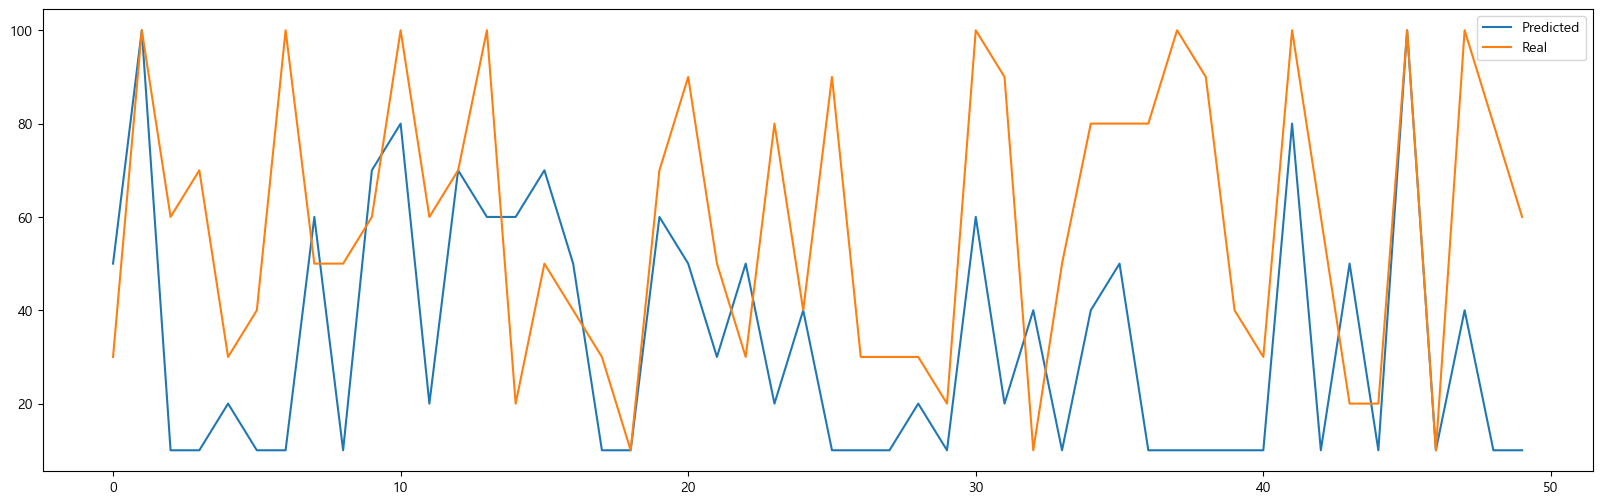

SVM 분류 모델 2023년 데이터 정확도 : 0.09373799462159048


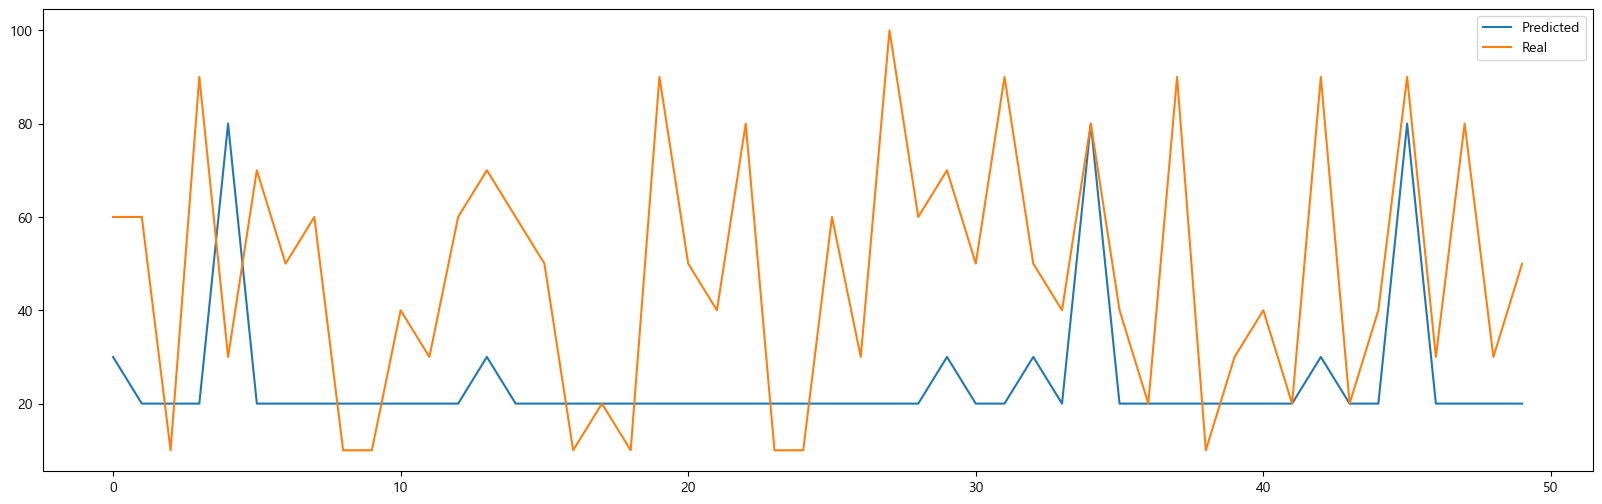

In [17]:
# 서포트 벡터 머신

from sklearn.svm import SVC

model_fit_and_visualize(SVC(), 'SVM 분류 모델')

# KNN(K-Nearest Neighbor; K-최근접 이웃)

KNN 분류 모델 학습 중
KNN 분류 모델 기존 데이터 정확도 : 0.34249290357256834


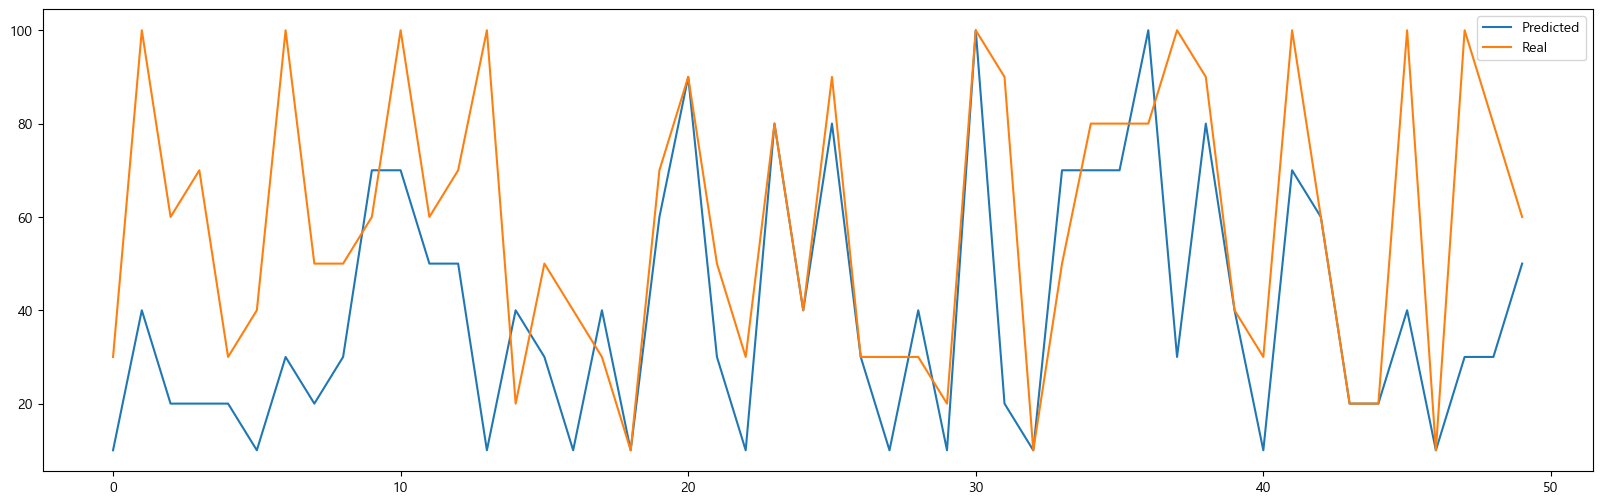

KNN 분류 모델 2023년 데이터 정확도 : 0.10103726469458317


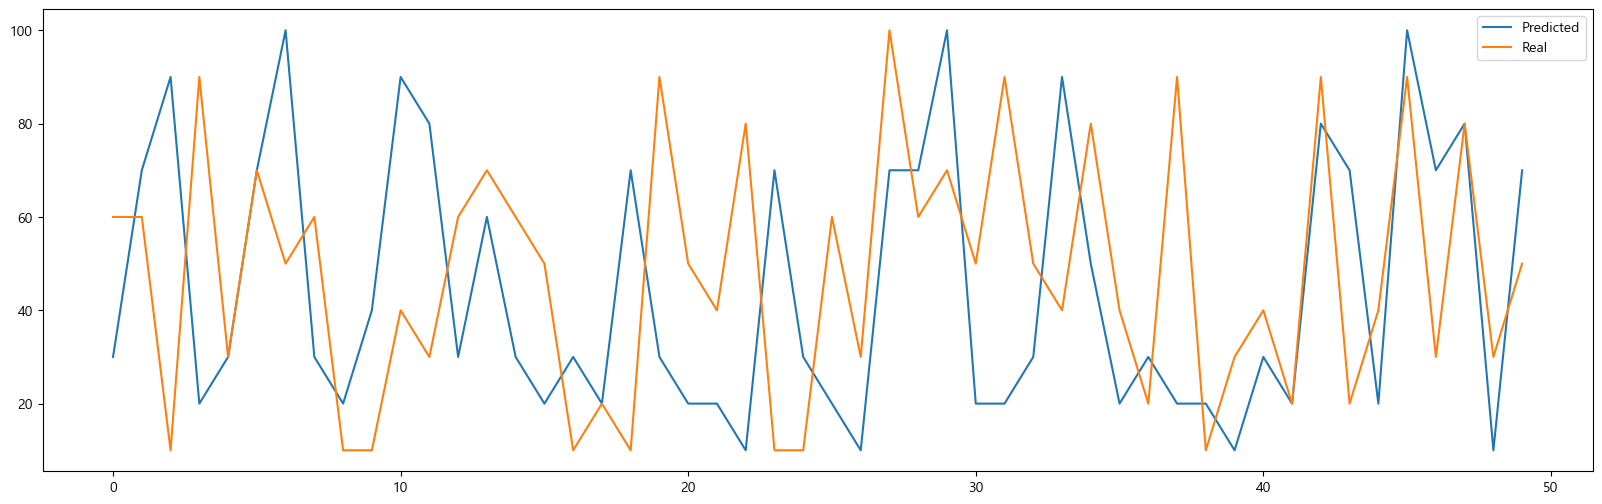

In [16]:
from sklearn.neighbors import KNeighborsClassifier

model_fit_and_visualize(KNeighborsClassifier(), 'KNN 분류 모델')